In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import mplfinance as mpl
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/home/VENV36/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<div class="jumbotron">
    <p class="display-1 h1">量化交易策略</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 交易策略

<dl class="row text-danger">
    <dt class="col-md-4">交易策略</dt>
    <dd class="col-md-8">交易策略是交易员进行交易时遵循的交易规则</dd>
</dl>

## 量化交易策略的分类

<center><img src="./img/strategy/strategyType.png" width=100%></center>

## 趋势追踪策略

- 一旦市场形成下降（或上升）趋势后，就将沿着原方向运行

- 趋势策略的来源：
    - 市场并非有效，有限理性决策者对信息的解读和操作不同
    - 价格以趋势方式演变

### 趋势

<dl class="row">
    <dt class="col-md-2">趋势</dt>
    <dd class="col-md-10">价格<strong>高点</strong>和<strong>低点</strong>随时间的移动</dd>
</dl>

- 上升趋势(uptrends)：由不断**升高的高点**和不断**升高的低点**构成
- 下降趋势(downtrends)：由不断**降低的低点**和**不断降低的高点**构成
- 震荡(sideways)：当高点和低点没有上述变化规律的时候构成震荡，或称作“横向整理”

<center>
<img src="./img/strategy/updownsideways.png" width=50%>   
</center>

### 趋势判断方法

- 设置价格正常波动范围（通道），当价格突破该范围时，认为出现趋势

<center><img src="./img/strategy/bands.jfif" width=60%></center>

- 通过价格的长短期移动平均线的相对位置来判断趋势

In [4]:
aprice = web.DataReader('AAPL',start=datetime(2019,1,1),end=datetime(2020,9,9),data_source='stooq')
aprice.head()
aprice.shape

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-08,113.95,118.99,112.68,112.82,231366563
2020-09-04,120.07,123.70,110.89,120.96,332607163
2020-09-03,126.91,128.84,120.50,120.88,257599640
2020-09-02,137.59,137.98,127.00,131.40,200118991
2020-09-01,132.76,134.80,130.53,134.18,152470142


(425, 5)

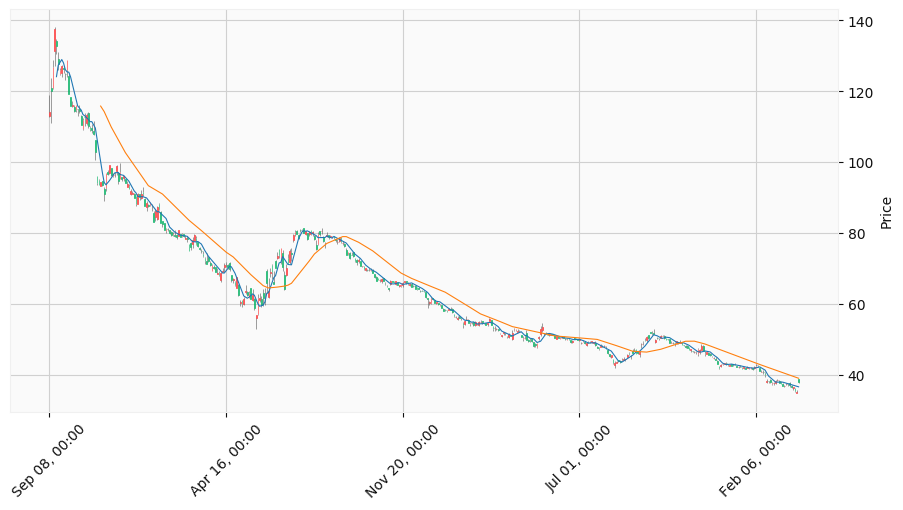

In [9]:
mpl.plot(aprice,type='candle',style='yahoo',mav=(5,30),figratio=(12,6),figscale=1)

## 统计套利

### 统计套利的定义

<dl class="row text-info">
    <dt class="col-md-4">统计套利</dt>
    <dd class="col-md-8">根据统计学的原理，利用选取的两个或多个资产的<strong>统计规律</strong>建立量化模型的套利方法</dd>
</dl>

- 假设一个策略在$t$时刻的累积收益贴现值为$v(t)$，若满足下述四个条件，则该策略是统计套利策略：
$$
\begin{split}
    (1)\quad & v(0)=0\\
    (2)\quad & \underset{t\to\infty}{\lim}E[v(t)]>0\\
    (3)\quad & \underset{t\to\infty}{\lim}P[v(t)<0]=0\\
    (4)\quad & 若\forall t<\infty, P[v(t)<0]>0, 则\underset{t\to\infty}{\lim}\frac{\text{var}[v(t)]}{t}=0
\end{split}
$$

- 统计套利是零初始成本(initial zero cost)、自融资(self-financing)的策略

- 统计套利与无风险套利的区别：统计套利在某个时间内是**可能发生亏损**的

### 统计套利的类型

- 跨期统计套利
- 跨市场统计套利
- 跨品种统计套利

### 跨期统计套利

- 利用同种商品的不同到期月份的期货合约之间出现的**异常价差**，最空价格高估合约，**同时**做多价格低估的合约，等价差回归到正常水平的时候平仓获利

- 跨期套利的来源：**季节性波动**，后者又是由于商品**供需**的季节性变化导致

### 跨市场统计套利

- 在不同市场，具有相同标的资产之间进行的套利

- 期现套利，当**期货市场**与**现货市场**在价格上出现差距，利用价格差距，低买高卖而获利

- 期现套利的来源：基差偏离持有成本
    - 基差(spread)$=$现货价格$-$期货价格

<center><img src="./img/strategy/spotfutures.jpg" width=100%></center>

##### 正向市场套利

<dl class="row">
    <dt class="col-md-4">正向市场(contango)</dt>
    <dd class="col-md-8">期货价格大于现货价格</dd>
</dl>

- **买入**现货的同时**卖出同等数量**的期货，等期现价差收敛时平掉套利头寸

##### 反向市场套利

<dl class="row">
    <dt class="col-md-4">反向市场(backwardation)</dt>
    <dd class="col-md-8">期货价格小于现货价格</dd>
</dl>

- **卖出**现货的同时**买入同等数量**的期货

### 跨品种套利

- 利用同一市场上的两种具有**高度相关性**的标的资产之间的价差进行套利

- 跨品种套利来源：两种资产的价差偏离它们之间的长期均衡关系

##### 如何选择跨品种套利

- 选择产品与原材料
    - 例如，螺纹钢与铁矿石、焦炭，生产$1$吨生铁需要$1.5\sim2$吨铁矿石和$0.4\sim0.6$吨焦炭

- 选择替代品
    - 例如，豆油、棕榈油、菜籽油

# 量化交易策略的组成

- 一个完整的交易策略应当由如下部分组成
    + 标的产品
    + 头寸规模
    + 入市时机
    + 离市时机
    + 执行交易

## 标的产品
> 应当交易什么样的产品

- 设定投资组合的好处：
    - 总有某个市场或某些产品出现趋势
    - 有些交易不明朗的市场或产品可以先观望
    - 当一些突发事件造成市场波动时，可以对冲风险

## 头寸规模
> 应当持有交易标的的数量

- 头寸规模与可用资金量紧密相关
    + **全仓**：用全部可用资金购入资产交易标的
    + **半仓**：用一半资金购入资产交易标的

- 头寸规模还与交易标的的价格相关

## 入市时机
> 决定何时开始建仓（包括增仓）

- 程序化交易的入市信号是由交易策略产生的

## 离市时机
> 决定何时退出头寸

### 止损
> 决定何时平掉亏损的头寸

- 止损是在建立头寸之前，已经预先确定退出的点位

- 如果市场的波动触及止损价位，必须每一次都毫无例外地退出

### 止盈
> 决定何时平掉盈利的头寸

# “海龟”交易策略

## 背景

> 伟大的交易员是天生造就还是后天培养的?

- 20世纪80年代，当时著名的交易员Dennis开展了一项“海龟”实验

- 招募13名交易新手，经过短暂的培训，每人被提供50$\sim$200万美元作为初始资金参与交易

- 随后的四年，年均复利达到80%

## 交易产品

- 芝加哥期货交易所（CBOT）    
    - 30 年期美国长期国债（Treasury Bond）、10 年期美国中期国库券（Treasury Note）
- 纽约咖啡可可与原糖交易所（NYCSC）    
    - 咖啡、可可、原糖、棉花
- 芝加哥商品交易所（CME）    
    - 瑞士法郎、德国马克、英镑、法国法郎、日圆、加拿大元、标准普尔500股票指数、欧洲美元、天美国短期国库券（Treasury Bill）  
- 纽约商品期货交易所（COMEX）    
    - 黄金、白银、铜  
- 纽约商业期货交易所（NYMEX）    
    - 原油、燃油、无铅汽油 

## 头寸规模

### 单位建仓量

- 计算当日实际波动范围（TR, True Range）：  
  $$ \text{TR} = \max\{\text{H}-\text{L}, \text{H}-\text{PDC}, \text{PDC}-\text{L}\} $$
  其中：  H——当日最高价，L——当日最低价，PDC——前个交易日的收盘价

- 计算 ATR (TR的20日指数平均）：  
  $$ \text{ATR}_t = (19\times\text{ATR}_{t-1} + \text{TR})/2\text{ATR}_0  $$ 
  其中：PDN——前个交易日的 ATR 值，TR——当日的实际范围 

- 计算单位建仓量n
   $$ n = \frac{\text{帐户的}1\%}{\text{ATR}\times\text{每点价值量}} $$ 

### 最大头寸限制

<center>

级别|类型|最大单位
---|---|---   
1|单一市场|4 个单位   
2|高度相关市场|6 个单位 
3|低度相关市场|10 个单位   
4|单向交易（多头或空头）|12 个单位
    
</center>

### 入市时机

> 以唐奇安通道(Donchian’s channel)突破作为入市时机

- 唐奇安通道：特定天数内的最高价和最低价组成的通道

- 20日系统

- 50日系统

> 在日间突破发生时进行交易，而不会等到每日收盘或次日开盘

### 止损

> 以头寸风险为基础设置止损，任何一笔交易都不能出现 2%以上的风险

- 容许风险为2%的最大止损就是价格波动2ATR

- 海龟系统的止损能够适应市场的波动性

### 止盈

- 20日系统
    - 多头头寸为 10 日最低价
    - 空头头寸为 10 日最高价

- 50日系统
    - 多头头寸为 20 日最低价
    - 空头头寸为 20 日最高价